In [6]:
from google.colab import files
uploaded = files.upload()

Saving photo_2024-10-30_20-18-02.jpg to photo_2024-10-30_20-18-02.jpg


In [9]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt


In [10]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


In [11]:
def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return image, caption

In [13]:
image_path = "/content/photo_2024-10-30_20-18-02.jpg"
image, caption = generate_caption(image_path)

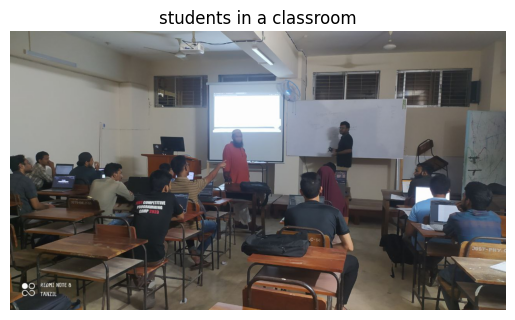

In [14]:
plt.imshow(image)
plt.axis("off")
plt.title(caption, fontsize=12, wrap=True)
plt.show()